In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import geopandas as gpd
import folium

In [3]:
# Load both datasets (replace 'your_dataset.csv' with actual file paths)
df_police = pd.read_csv("D:\\Anindya\\ISI Project - Data Cleaning + Data Annotation\\Police Disposal of States\\Police Disposal of Cases (States).csv")
df_court = pd.read_csv("D:\\Anindya\\ISI Project - Data Cleaning + Data Annotation\\Court Disposal of States\\Court Disposal of Cases(States).csv")

# Check the first few rows of each to ensure they are loaded correctly
df_police.head(), df_court.head()

(   Year   Crime Type         States/UTs  Total # FIR  Total # Final Report  \
 0  2022  (IPC + SLL)     Andhra Pradesh       195284                 26640   
 1  2022  (IPC + SLL)  Arunachal Pradesh         2761                  1699   
 2  2022  (IPC + SLL)              Assam        68937                 95256   
 3  2022  (IPC + SLL)              Bihar       347835                 63505   
 4  2022  (IPC + SLL)       Chhattisgarh       121065                 14965   
 
    FR Non-Cognizable  FR False  Mistake of Fact / Law / Civil Dispute  \
 0                 56      5963                                   3539   
 1                  2         3                                    103   
 2                270      2895                                  20944   
 3               2050      9690                                  14859   
 4                567      2081                                    992   
 
    True but insufficient evidence  Cases Abated  Total # Charge Sheeted  \
 0

In [4]:
# Grouping the police dataset by Year and State, summing total cases
df_police_grouped = df_police.groupby(['Year', 'States/UTs'])['Total # Cases Disposed Off by Police'].sum().reset_index()

# Check the processed data for police disposal
df_police_grouped.head()

Year         States/UTs  Total # Cases Disposed Off by Police
0  2018        A&N Islands                                  3822
1  2018     Andhra Pradesh                                154141
2  2018  Arunachal Pradesh                                  2572
3  2018              Assam                                137098
4  2018              Bihar                                249276

In [5]:
# Grouping the court dataset by Year and State, summing total cases
df_court_grouped = df_court.groupby(['Year', 'States/Uts'])['Total # Cases Disposed Off by Courts'].sum().reset_index()

# Check the processed data for court disposal
df_court_grouped.head()

Year         States/Uts  Total # Cases Disposed Off by Courts
0  2018        A&N Islands                                  1534
1  2018     Andhra Pradesh                                125902
2  2018  Arunachal Pradesh                                   476
3  2018              Assam                                 38943
4  2018              Bihar                                 21185

In [6]:
def generate_distinct_colors(num_colors):
    """
    Generate distinct colors for a given number of pie chart sections.
    Colors will be randomized to ensure better visual distinction.
    """
    colors = []
    for i in range(num_colors):
        color = [random.random(), random.random(), random.random()]  # Random RGB values
        colors.append(color)
    return colors

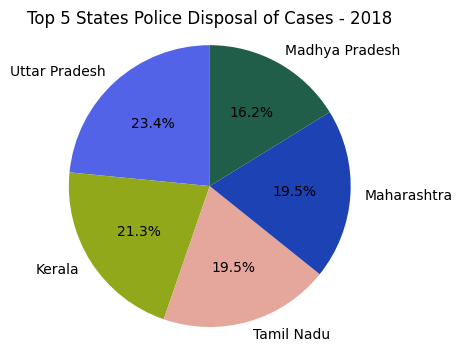

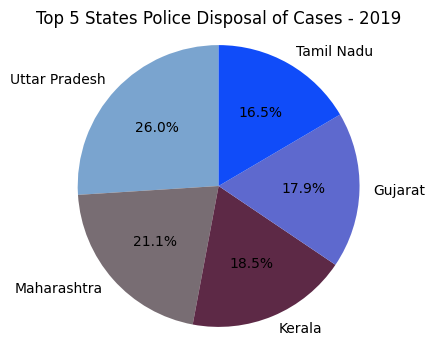

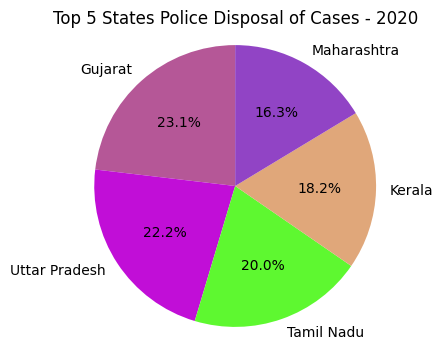

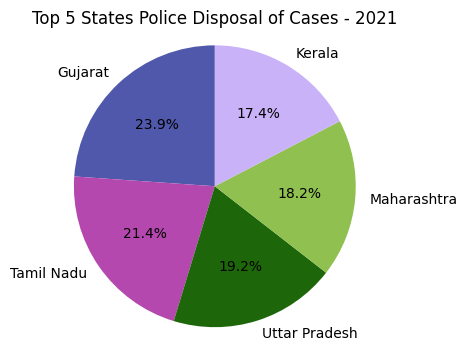

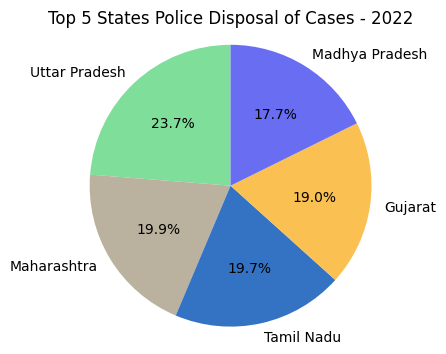

In [7]:
# Loop to create pie charts for each year (Police Disposal)
for year in range(2018, 2023):
    # Filter the data for the current year
    year_data = df_police_grouped[df_police_grouped['Year'] == year]
    
    # Sort the data by Total_Cases to get top 5 states
    top_5_states = year_data.nlargest(5, 'Total # Cases Disposed Off by Police')
    
    # Generate a distinct color palette for this year using random colors
    pie_colors = generate_distinct_colors(5)  # 5 distinct colors for the top 5 states
    
    # Create a pie chart for the top 5 states in the current year
    plt.figure(figsize=(4, 4))
    plt.pie(top_5_states['Total # Cases Disposed Off by Police'], labels=top_5_states['States/UTs'], autopct='%1.1f%%', colors=pie_colors, startangle=90)
    plt.title(f'Top 5 States Police Disposal of Cases - {year}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    plt.show()

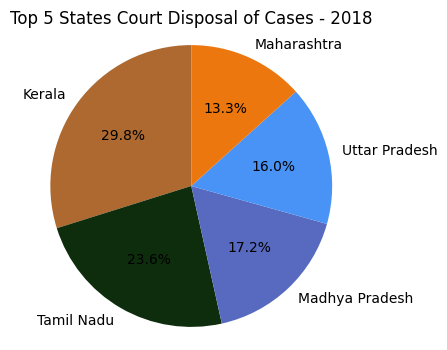

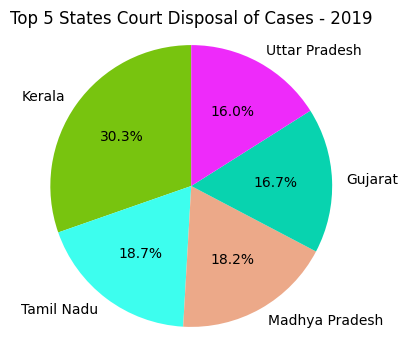

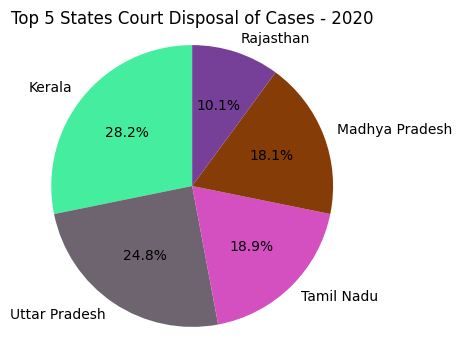

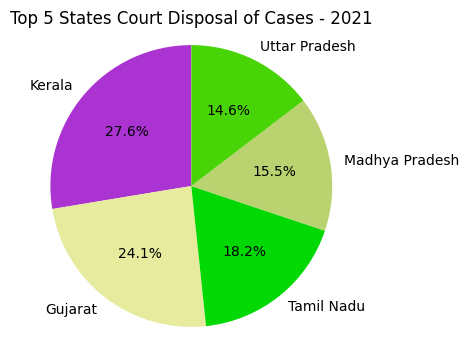

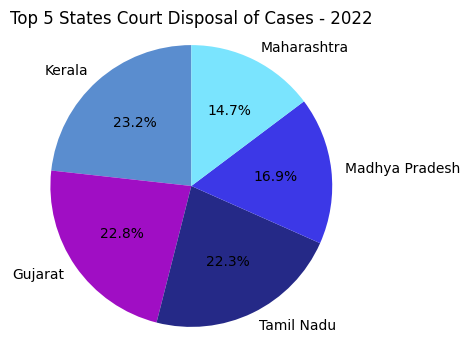

In [8]:
# Loop to create pie charts for each year (Court Disposal)
for year in range(2018, 2023):
    # Filter the data for the current year
    year_data = df_court_grouped[df_court_grouped['Year'] == year]
    
    # Sort the data by Total_Cases to get top 5 states
    top_5_states = year_data.nlargest(5, 'Total # Cases Disposed Off by Courts')
    
    # Generate a distinct color palette for this year using random colors
    pie_colors = generate_distinct_colors(5)  # 5 distinct colors for the top 5 states
    
    # Create a pie chart for the top 5 states in the current year
    plt.figure(figsize=(4, 4))
    plt.pie(top_5_states['Total # Cases Disposed Off by Courts'], labels=top_5_states['States/Uts'], autopct='%1.1f%%', colors=pie_colors, startangle=90)
    plt.title(f'Top 5 States Court Disposal of Cases - {year}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    plt.show()

In [9]:
# Manually specify the states for both datasets
states_police = ['Bihar', 'Delhi', 'West Bengal', 'Uttar Pradesh', 'Maharashtra']  # Replace with actual state names
states_court = ['Bihar', 'Delhi', 'West Bengal', 'Uttar Pradesh', 'Maharashtra']  # Replace with actual state names

# Filter the police data for the specified states
df_police_selected = df_police[df_police['States/UTs'].isin(states_police)]

# Filter the court data for the specified states
df_court_selected = df_court[df_court['States/Uts'].isin(states_court)]

# Pivot the police dataset for the selected states (one row per state, columns for each year)
df_police_selected_pivot = df_police_selected.pivot_table(index='States/UTs', columns='Year', values='Total # Cases Disposed Off by Police', aggfunc='sum')

# Pivot the court dataset for the selected states (one row per state, columns for each year)
df_court_selected_pivot = df_court_selected.pivot_table(index='States/Uts', columns='Year', values='Total # Cases Disposed Off by Courts', aggfunc='sum')

# Merge both datasets (police and court) on the 'State' column to create a combined dataframe for plotting
df_combined = pd.concat([df_police_selected_pivot, df_court_selected_pivot], axis=1, keys=['Police', 'Court'])

# Check the combined data
df_combined


Police                                   Court                  \
Year             2018    2019    2020    2021    2022    2018    2019    2020   
Bihar          249276  252311  220046  278337  362828   21185   26839    5761   
Delhi          293844  327437  266035  301121  312907   30895   37073   28879   
Maharashtra    489356  513302  486744  562539  543699  237285  231181   87940   
Uttar Pradesh  587098  633955  662034  594931  649085  285247  273411  257886   
West Bengal    198826  199681  177025  183948  178462   35582   35582   15620   

                               
Year             2021    2022  
Bihar           10699   32735  
Delhi           50073   66503  
Maharashtra    232640  309911  
Uttar Pradesh  268236  234353  
West Bengal     23651   35481

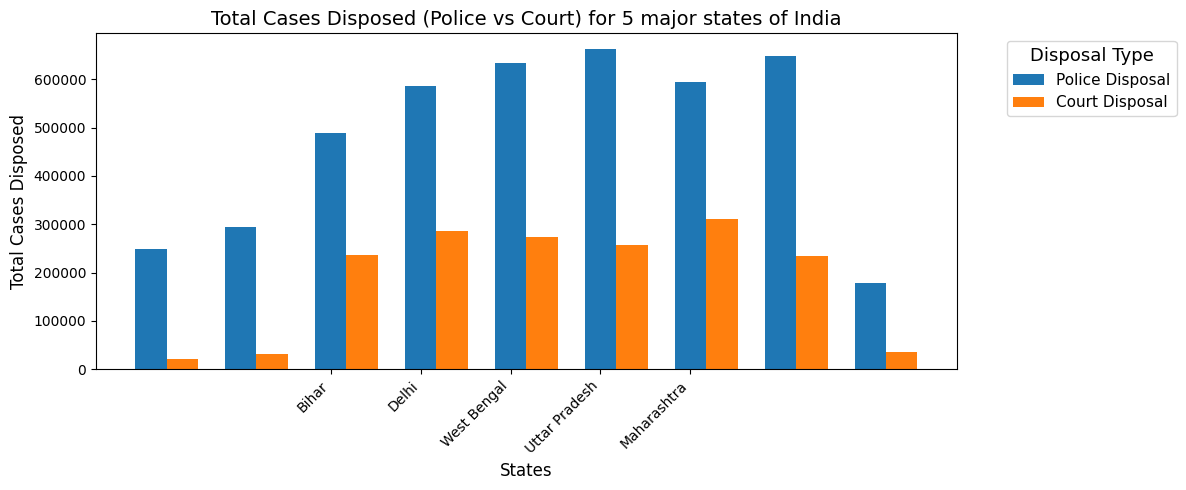

In [11]:
# Manually specify the 5 states you want to plot (replace with actual state names)
selected_states = ['Bihar', 'Delhi', 'West Bengal', 'Uttar Pradesh', 'Maharashtra']  # Replace with your specific states

# Filter the police and court data to include only the rows corresponding to the specified states
df_police_selected_pivot_selected = df_police_selected_pivot[df_police_selected_pivot.index.isin(selected_states)]
df_court_selected_pivot_selected = df_court_selected_pivot[df_court_selected_pivot.index.isin(selected_states)]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Bar width and positioning
bar_width = 0.35
years = [2018, 2019, 2020, 2021, 2022]  # Year range for the x-axis
num_states = len(selected_states)  # Number of states (5 in total)
index = range(num_states)  # Indices for states

# Space between the groups of bars (states)
space_between_groups = 1  # This controls the space between the bars of each state group

# Loop through the years to plot police and court data side by side
for i, year in enumerate(years):
    # Adjust the x-position for police and court data to avoid overlap
    ax.bar(
        [p + space_between_groups*i for p in index],  # x positions for police data
        df_police_selected_pivot_selected[year],      # Data for police
        bar_width,
        label=f'Police {year}',                       # Label for police data
        color='tab:blue'                              # Color for police
    )
    ax.bar(
        [p + space_between_groups*i + bar_width for p in index],  # x positions for court data (shifted by bar_width)
        df_court_selected_pivot_selected[year],                    # Data for court
        bar_width,
        label=f'Court {year}',                            # Label for court data
        color='tab:orange'                               # Color for court
    )

# Adjust x-axis to space out the groups of states correctly
ax.set_title('Total Cases Disposed (Police vs Court) for 5 major states of India', fontsize=14)
ax.set_xlabel('States', fontsize=12)
ax.set_ylabel('Total Cases Disposed', fontsize=12)

# Set x-ticks for each state group
ax.set_xticks([p + space_between_groups*(len(years)-1)/2 for p in index])  # Center ticks for each state group
ax.set_xticklabels(selected_states, rotation=45, ha='right')  # State names on the x-axis

# Add legend
ax.legend(['Police Disposal', 'Court Disposal'], title='Disposal Type', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()
